In [1]:
# Importa bibliotecas
import matplotlib.pyplot as plt
import numpy as np
import csv
from scipy.signal import argrelextrema

In [86]:
# abrimos el archivo y obtenemos las columnas que nos itneresan
# Se baso en la siguiente pagina web: https://realpython.com/python-csv/
def leer_archivo(nombre):
    #Hay que analizar las primeras 3 renglones por separado.
    #a, b seran los extremos del intervalo en Hz
    
    arch = open(nombre, "r")
    if arch.mode == 'r':
        contenido = arch.read()
        contenido = contenido.split("\n")
        tam = int(contenido[0].split(": ")[1])
        [a, b] = contenido[2].split(": ")[1].split(" ")

        yy = np.zeros(tam)
        for i in range(3, tam):
            yy[i-3] = int(contenido[i])
            
    else:
        print("No existe el archivo")
    
    return [yy, float(a), float(b)]

In [87]:
yy, a, b = leer_archivo('unidimension.slc')

9022.823242


In [88]:
yy = yy - min(yy)

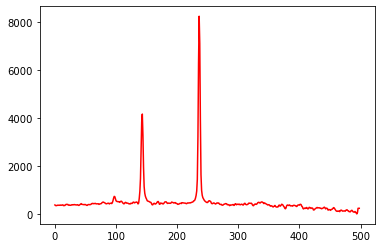

In [89]:
# Con escala en enteros
plt.plot(yy, color = "red")
plt.show()

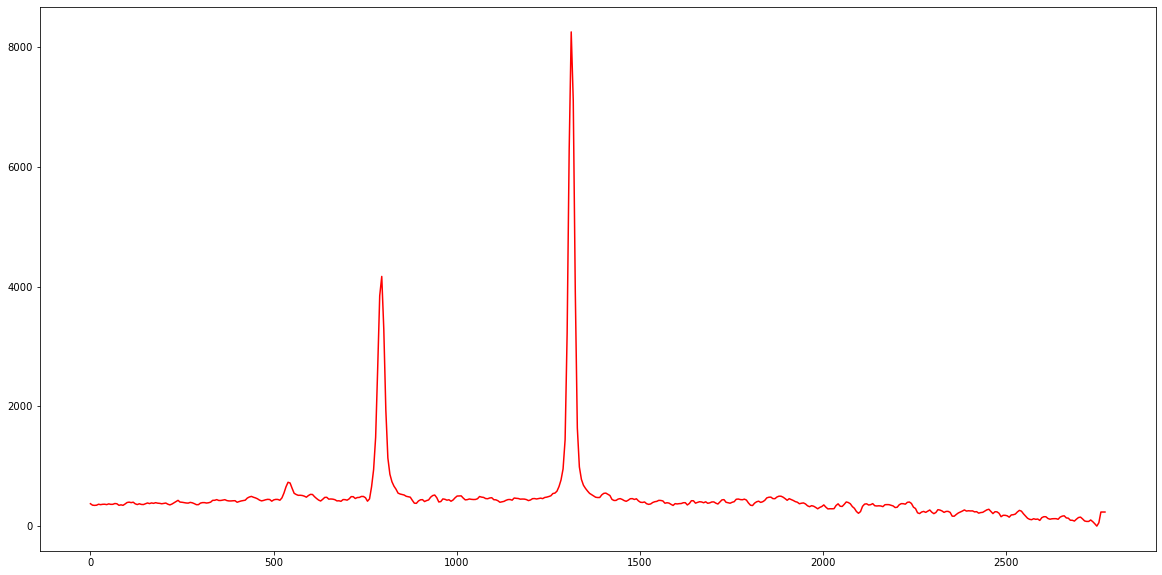

In [115]:
# Generar la secuencia xx
paso_hz = (a-b)/len(yy)
xx = [i*paso for i in range(0, len(yy))]

# Con la escala buena
plt.figure(figsize=(20,10))
plt.plot(xx, yy, color = "red")
plt.show()

In [5]:
# No corrimos esta celda porque flojera

# Guarda un archivo formato .txt con los valores de xx y yy
name = 'senal_teorica.txt'
fid2 = open(name,"w") #Opens text file in writing mode https://www.tutorialspoint.com/python/python_files_io.htm
for i in range(0, len(xx)): # Cycle for each one of the float elements (numbers) of the neuronal_traces file
    entry = str(xx[i])+" "+str(yy[i])+"\n"
    fid2.write(entry) #Saves the time if we are in the first column
fid2.close()

In [94]:
# Obtener las deltas, i.e. escala adecuada en el eje x
maximo = max(yy)
print(maximo)
# argrelextrema(yy, np.greater) #Obtiene los valores maximos
# print(maximos[0])
# if len(maximos[0]) == 1:
#     print("Solamente hay un maximo.")

# else:
#     max1, max2 = a[0]

#     print(xx[max2] - xx[max1]) #Imprime la diferencia entre estos dos maximos

#     delta_e = (xx[len(xx)-1]-xx[0])/len(xx)
#     print(delta_e)

8256.0


In [95]:
#Generando un vector con la se;al trasladada 1 vez
def trasladar(ys, n):
    # delta = xs[n]
    tam = len(ys) + n
    y_new = np.zeros(tam)
    
    for i in range( 0, tam ):
        if i < len(ys):
            y_new[i] += ys[i]
        if i >= n:
            y_new[i] += -ys[i-n]
    return y_new    

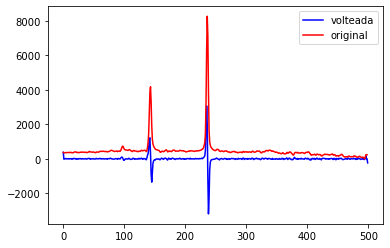

In [96]:
n = 1
y_new = trasladar(yy, n)

plt.plot(y_new, color = "blue", label = "volteada")
plt.plot(yy, color ="red", label = "original")
plt.legend()
plt.show()

In [97]:
def aplicar(x, y, m):
    # El tama;o de x tiene que ser del tama;o de y mas m
    #x y y son arreglos
    x_new = np.copy(x)
    for i in range(0, len(y)):
        x_new[m+i] += y[i]
    return x_new

In [98]:
def convolucion(yy, n = 40, m = 64): #que n va de 1 hasta 64
    tamano = len(yy)
    ceros = np.zeros(tamano+n*m)
    y_new = trasladar(yy, n)

    for i in range(0, m):
        ceros = aplicar(ceros, (-1)**i*yy, n*i)
    return ceros

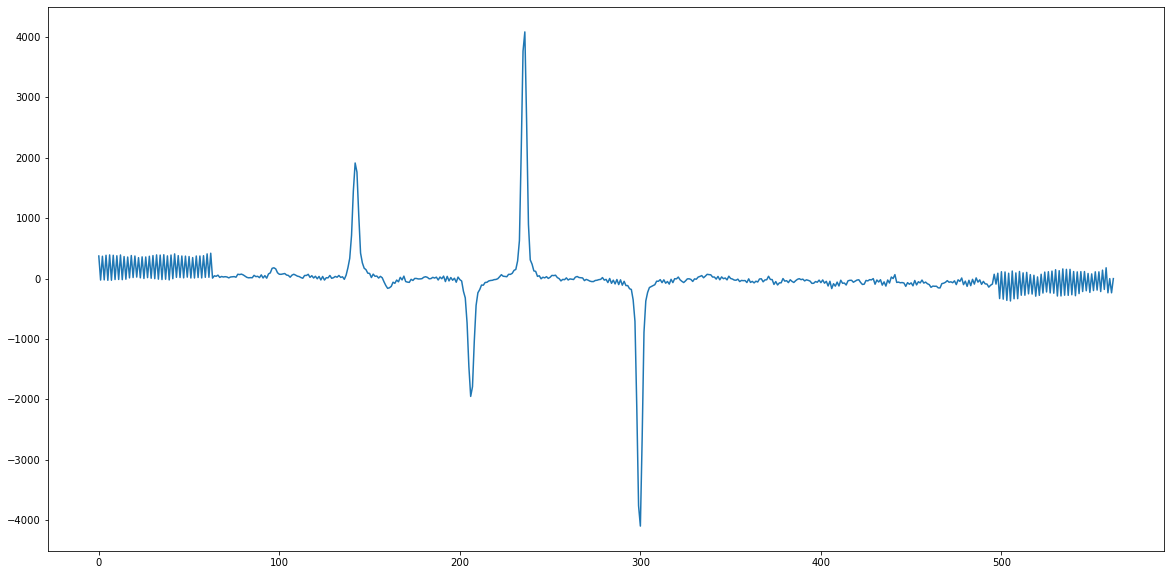

In [99]:
ceros = convolucion(yy, 1, 64)
plt.figure(figsize=(20,10))
plt.plot(ceros)
plt.show()

In [100]:
#Input: yy
def integrar(yy, intervalo = 60, m = 8):
    #intervalo es el maximo valor de las n
    
    integrs = np.zeros(intervalo)
    
    for i in range(1, intervalo):
        y_new = convolucion(yy, i, m)
        integral = sum(abs(y_new))
        integrs[i] = integral
    return integrs

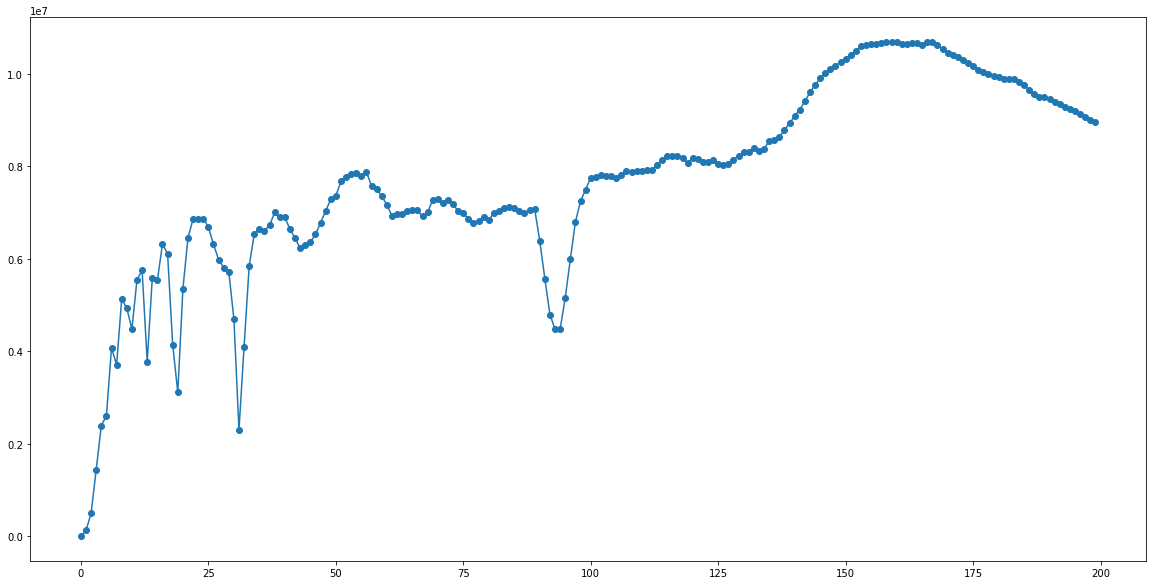

valores maximos en: [  7  10  13  15  19  23  31  36  43  55  61  63  67  71  77  80  87  93
 103 105 108 110 119 122 126 133 156 159 162 165 181]
Mínimo:  3106518.0


In [108]:
intervalo = 200
m = 128
integrs = integrar(yy, intervalo, m)

plt.figure(figsize=(20,10))
plt.plot(integrs, marker = 'o')
plt.show()

print("valores maximos en: "+str(argrelextrema(integrs, np.less)[0]))
print("Mínimo: ", integrs[19])

In [116]:
print("Mínimo: ", xx[19] * paso_hz, paso_hz)

Mínimo:  587.6308921878228 5.561289571142285


In [102]:
maximo = max(argrelextrema(integrs, np.less)[0])
print(maximo*delta_e)

# Note que el valor anterior debe corresponder con la diferencia entre los dos maximos originales
print(xx[max2] - xx[max1])

5.43125
105.66450185170342


In [105]:
31*paso_hz

172.39997670541084